In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx

[[ True  True  True  True  True  True  True  True  True  True  True  True
  False  True  True False  True  True  True  True  True  True  True  True
   True  True  True  True  True  True]]


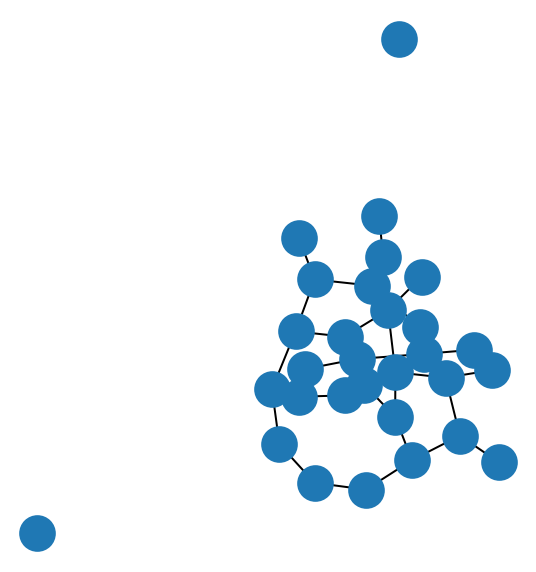

In [36]:
def DFS(G, visited, v):
    '''Performs a Depth First Search at a given vertex

    Inputs:
      G          : a NetworkX graph object 
      visited    : a numpy array with boolean values. An element will be false if a vertex hasn't been visited yet
      v          : a vertex in G to start the search at

    '''
    
    #Stop the DFS if a node has already been visited
    if visited[0,v]:
        return
    #Visit the current node
    visited[0,v] = True
    
    #This adds the adjacent nodes to the list of neighbors
    neighbors = G[v]
    #This starts the DFS for the neighbors of v
    for neighbor in neighbors:
        DFS(G,visited,neighbor)
    
    
    
    

seed = 63
n = 30
p = 0.1
G = nx.gnp_random_graph(n,p,seed)
visited = np.zeros((1,n), dtype=bool)

#Run the DFS
DFS(G, visited, 0)
#This prints an array with true for the nodes visited
print(visited)

#This plots the graph, for easy comparison
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
nx.draw(G)

[[1 1 1 1 2 1 1 1 1 1 3 1 1 1 1 1 4 5 1 1 1 1 1 6 1 1 7 1 1 1]]


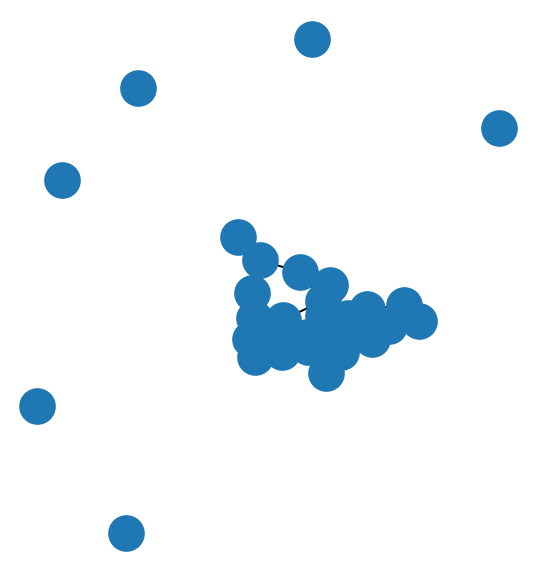

In [43]:
#This is a modified DFS to include components
def DFS(G, visited, v, count, components):
    '''Performs a Depth First Search at a given vertex

    Inputs:
      G          : a NetworkX graph object 
      visited    : a numpy array with boolean values. An element will be false if a vertex hasn't been visited yet
      v          : a vertex in G to start the search at
      count      : the number of components
      components : the array containing the component number of each vertex

    '''
    
    #Stop the DFS if a node has already been visited
    if visited[0,v]:
        return
    #Visit the current node
    visited[0,v] = True
    #Add the component number of this vertex
    components[0,v] = count
    
    #This adds the adjacent nodes to the list of neighbors
    neighbors = G[v]
    #This starts the DFS for the neighbors of v
    for neighbor in neighbors:
        DFS(G,visited,neighbor, count, components)
    
def Components(G):
    '''Finds the components of G

    Inputs:
      G          : a NetworkX graph object 

    '''
    #get the number of nodes
    n = len(list(G))
    #create visited for the DFS
    visited = np.zeros((1,n), dtype=bool)
    #Create the components array
    components = np.zeros((1,n), dtype = int)
    #Component count
    count = 0
    
    for i in range(n):
        if not visited[0,i]:
            count += 1
            DFS(G, visited, i, count, components)
    return(components)
    
    

seed = 14
n = 30
p = 0.1
G = nx.gnp_random_graph(n,p,seed)

#Run the DFS
print(Components(G))

#This plots the graph, for easy comparison
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
nx.draw(G)